In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data = pd.read_csv("../input/sample_submission.csv")
train = pd.read_json(open("../input/train.json", "r"))
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [9]:
train[-5:]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
9999,1.0,2,297160caf8a88c10718b492d4672c6b4,2016-06-02 05:41:05,"30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...",E 30 St,"[Elevator, Laundry in Building, Laundry in Uni...",medium,40.7426,7098690,-73.9790,2a1ee03b449700c3a15dd8c9a505c525,[https://photos.renthop.com/2/7098690_18396d32...,3200,230 E 30 St
99991,1.0,1,9e871ccfea7b07686c101548ca693af6,2016-04-04 18:22:34,"HIGH END condo finishes, swimming pool, and ki...",Rector Pl,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",low,40.7102,6822449,-74.0163,ef20d40b528500037e37b167787ac089,[https://photos.renthop.com/2/6822449_b429587b...,3950,225 Rector Place
99992,1.0,1,7967a1280bf3f7644500fc79d2696b0e,2016-04-16 02:13:40,Large Renovated One Bedroom Apartment with Sta...,West 45th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7601,6881461,-73.9900,d889a9552265fe359e7d36d172084fcb,[https://photos.renthop.com/2/6881461_20a86530...,2595,341 West 45th Street
99993,1.0,0,ad67f6181a49bde19218929b401b31b7,2016-04-08 02:13:33,Stylishly sleek studio apartment with unsurpas...,Wall Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7066,6841891,-74.0101,9fd3af5b2d23951e028059e8940a55d7,[https://photos.renthop.com/2/6841891_124c9c44...,3350,37 Wall Street
99994,1.0,2,5173052db6efc0caaa4d817112a70f32,2016-04-12 02:48:07,Look no further!!! This giant 2 bedroom apart...,Park Terrace East,[Hardwood Floors],low,40.8699,6858245,-73.9172,d7f57128272bfd82e33a61999b5f4c42,[https://photos.renthop.com/2/6858245_c4380bde...,2200,30 Park Terrace East


In [4]:
test = pd.read_json(open("../input/test.json", "r"))
test.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street


In [5]:
train.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')

In [86]:
test.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'latitude', u'listing_id',
       u'longitude', u'manager_id', u'photos', u'price', u'street_address'],
      dtype='object')

In [87]:
train.isnull().values.any()

False

In [88]:
data_types = train.dtypes
num_cols = list(data_types[data_types=='int64'].index) + list(data_types[data_types=='float64'].index)

In [89]:
num_cols

[u'bedrooms', u'listing_id', u'price', u'bathrooms', u'latitude', u'longitude']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000006E564D30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000006E23AE80>]], dtype=object)

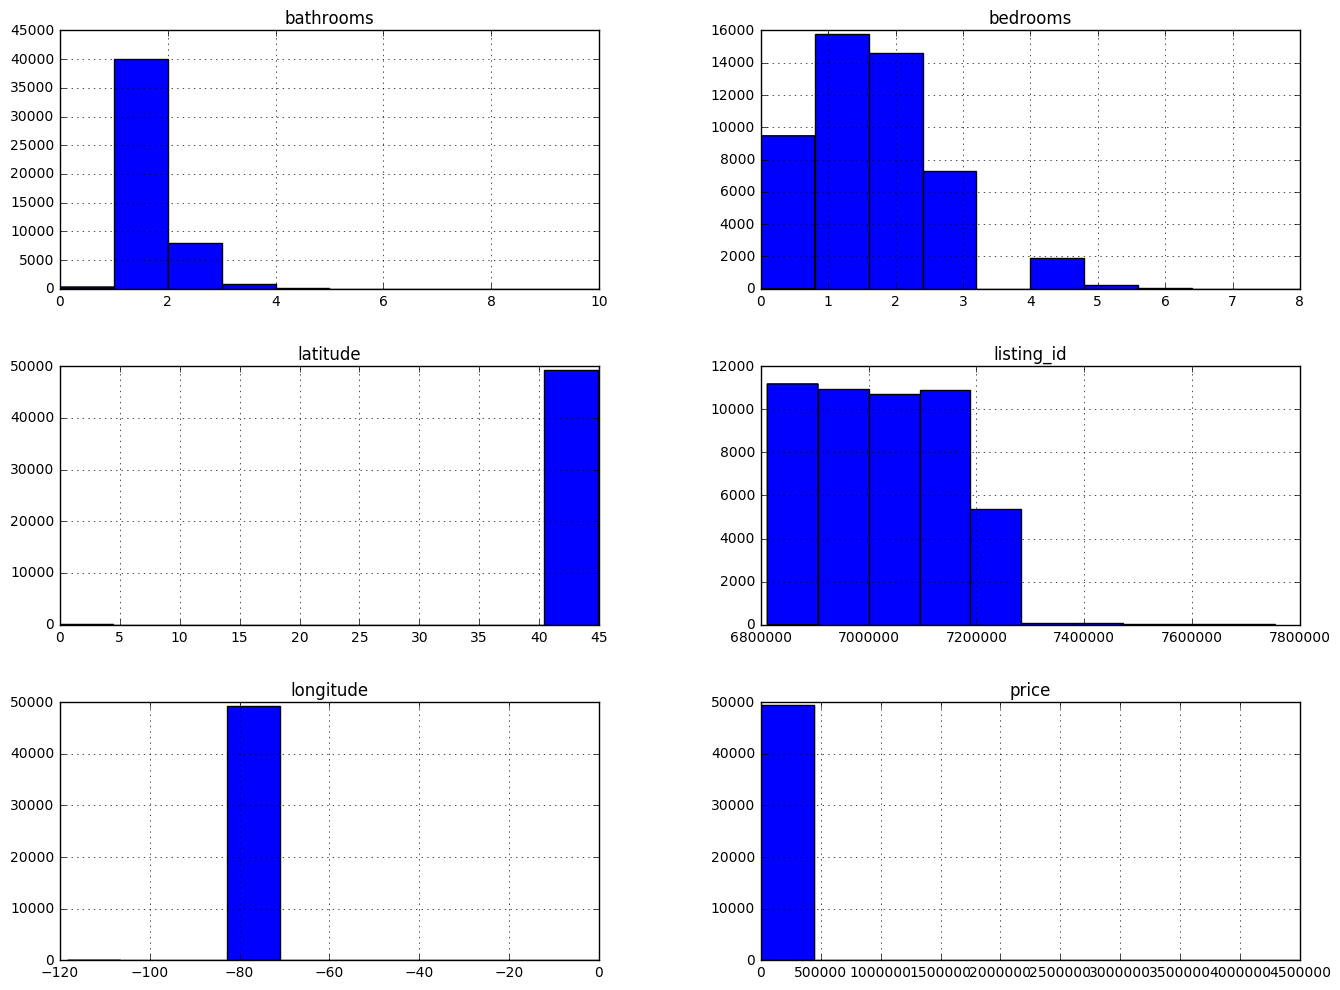

In [90]:
train[num_cols].hist(bins=10, figsize=(16,12))

In [91]:
print train.describe()

         bathrooms      bedrooms      latitude    listing_id     longitude  \
count  49352.00000  49352.000000  49352.000000  4.935200e+04  49352.000000   
mean       1.21218      1.541640     40.741545  7.024055e+06    -73.955716   
std        0.50142      1.115018      0.638535  1.262746e+05      1.177912   
min        0.00000      0.000000      0.000000  6.811957e+06   -118.271000   
25%        1.00000      1.000000     40.728300  6.915888e+06    -73.991700   
50%        1.00000      1.000000     40.751800  7.021070e+06    -73.977900   
75%        1.00000      2.000000     40.774300  7.128733e+06    -73.954800   
max       10.00000      8.000000     44.883500  7.753784e+06      0.000000   

              price  
count  4.935200e+04  
mean   3.830174e+03  
std    2.206687e+04  
min    4.300000e+01  
25%    2.500000e+03  
50%    3.150000e+03  
75%    4.100000e+03  
max    4.490000e+06  


In [92]:
data_types

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

In [93]:
train_test = pd.concat([train,test])

In [94]:
train_test.shape

(124011, 15)

In [95]:
missingCoords = train_test[(train_test.longitude == 0) | (train_test.latitude == 0)]

In [96]:
missingCoords

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
106350,5.0,6,0,2016-04-18 02:14:51,***NO BROKER FEE***<BR><BR>Situated on a gorge...,Decatur Street,"[Garden/Patio, Terrace, No Fee, Outdoor Space,...",low,0.0,6888639,0.0,c639a76f31c41923cd91d23875a72264,[https://photos.renthop.com/2/6888639_87eb648f...,9995,259 Decatur Street
2028,1.0,1,1490317c3a31185f0c8115f01d1acc5b,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn","[hardwood floors, own entrance, oak cabinets]",low,0.0,7087715,0.0,2290f91e45472ecaf0983c5af18098ce,[https://photos.renthop.com/2/7087715_mb_3517f...,1750,145 28 Street
37426,1.0,1,0,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,"[Reduced Fee, Cats Allowed]",low,0.0,7094527,0.0,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7094527_mb_7f196...,1725,Van Sicklen street
39134,1.0,2,a1b2bd0758c6f14be815e4d9382b8169,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy","[Views, No Fee, Duplex, Laundry in Unit, Cats ...",low,0.0,7174094,0.0,42cb18c3898c42b7512065e7d3e1e8bd,[https://photos.renthop.com/2/7174094_mb_e3c7e...,4395,219 E 28th
46941,1.0,2,8f837ada8d7ec5d251a369cd5909af7c,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,"[Laundry in Unit, Roof Deck, <null>]",medium,0.0,6981091,0.0,b93b333035403fc090fb51372fb082f9,[https://photos.renthop.com/2/6981091_mb_efd73...,2950,1632 Madison Ave
49884,1.0,2,ebb1fe8e32b8565f057a20abc495a2b5,2016-05-10 10:25:19,"New construction, luxury highrise, The two bed...",24th St LIC,"[Doorman, Fitness Center, Laundry in Unit, Cat...",low,0.0,6991620,0.0,dd85ae9242e4012be8a386d37c1d9453,[https://photos.renthop.com/2/6991620_mb_e7c05...,3619,41-42 24th St
63688,4.0,3,f389c8eb16e5d0c771615fb30f3cc9d6,2016-05-11 18:07:15,"This high floor, mint condition, corner unit b...",450 East 83rd Street apt 21D (Furnished),"[Furnished, Laundry In Unit, Cats Allowed, Dog...",low,0.0,6997950,0.0,355ccd9223a7481c5d223d39b4e65e90,[https://photos.renthop.com/2/6997950_4ef02f8c...,16500,450 East 83rd Street
66197,1.0,1,4d7c804afea366c666731bee9c56919e,2016-05-10 14:30:12,NO FEE! Spacious one bedroom apartment in a F...,west 87,"[Doorman, Fitness Center, No Fee, Cats Allowed...",low,0.0,6991901,0.0,7d4f285c15b11c61bacfbf8e7a49252d,[https://photos.renthop.com/2/6991901_mb_e3232...,3600,247 west 87
69423,1.0,2,55ab81a4ccd5ea862fba344dc29f1463,2016-05-24 17:43:39,Fantastic 2 bed with the works! It has 2 queen...,118 W 109th,"[Cats Allowed, Dogs Allowed, No Fee, Laundry i...",low,0.0,7062134,0.0,91c09ae8bfdc7e5ba7d6385e33a6064d,[https://photos.renthop.com/2/7062134_mb_9f18c...,3200,118 W 109th
70841,1.0,1,09e6efa1a58a3cd753aeee80bdf5ec36,2016-05-10 10:11:20,No fee! Prime NOLITA neighborhood with amazing...,Mott St,"[No Fee, <null>]",low,0.0,6991613,0.0,dd85ae9242e4012be8a386d37c1d9453,[https://photos.renthop.com/2/6991613_mb_b7cec...,3495,246 Mott St


In [97]:
missingCoords.street_address.unique()

array([u'259 Decatur Street', u'145 28 Street', u'Van Sicklen street',
       u'219 E 28th', u'1632 Madison Ave', u'41-42 24th St ',
       u'450 East 83rd Street', u'247 west 87', u'118 W 109th',
       u'246 Mott St ', u'21 W 106th', u'338 e. 53',
       u'118 East 4th Street', u'360 W. 43rd Street',
       u'647 Prospect Place ', u'785 9th ave', u'965 Amsterdam',
       u'2964 Perry Avenue', u'e 5 th ', u'330 west 45th', u'515 W. 156',
       u'140 West 55th st ', u'454 West 49th Street',
       u'61 west 10th street', u'1708 Lexington Avenue ',
       u'844 St. Johns Place ', u'300 e 29 st ', u'23 West 109th street',
       u'241 W 109th', u'520 E 14th ', u'216 west 108',
       u'354 cathedral parkway', u'854 St. Johns Place', u'50 W 56th st',
       u'17 St Marks Place', u'267 west 71', u'216 west 89th street',
       u'682 Ocean Avenue '], dtype=object)

In [112]:
tmp=train_test[train_test.street_address.str.contains('E 28th') & (train_test.latitude != 0)]
tmp['latitude','longitude','display_address','street_address']
# print 'latitude:',tmp.latitude.mean()
# print 'longitude:',tmp.longitude.mean()

KeyError: ('latitude', 'longitude', 'display_address', 'street_address')

In [99]:
miss_street_address = ['Decatur Street','28 Street','E 28th',]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
122306,1.0,0,6289dd7229f0d3b87254860764be70ab,2016-04-27 03:44:49,Beautiful studio apartment in Luxury Building ...,W 28 Street,"[Doorman, Elevator, Fitness Center, Loft, Laun...",low,40.7516,6931169,-74.0032,aa5f74da43dceaca9b34ed7f55a39f5d,[https://photos.renthop.com/2/6931169_631cf40e...,3110,525 W 28 Street
2409,1.0,2,636d75aff077212fe787dff185601983,2016-06-09 04:24:53,BEAUTIFUL 2 BR APARTMENT!!!! LAUNDRY!!! GREAT ...,E 28 Street,"[Laundry in Building, Hardwood Floors, Dogs Al...",low,40.7418,7130896,-73.9798,f6a30548f9232c2888f78dc605574ef8,[https://photos.renthop.com/2/7130896_97529bdc...,4395,219 E 28 Street
840,1.0,2,636d75aff077212fe787dff185601983,2016-06-14 12:02:21,"Renovated w/exposed brick wall: Immaculate, na...",E 28 Street,"[Balcony, Laundry in Building, Laundry in Unit...",low,40.7418,7157285,-73.9798,136b844f49c4eae017d6cabe8ca03b9d,[https://photos.renthop.com/2/7157285_c79dd41d...,4295,219 E 28 Street
104691,1.0,1,6289dd7229f0d3b87254860764be70ab,2016-04-27 02:51:08,Beautiful 1 bedrooms apartment in Luxury Build...,W 28 Street,"[Doorman, Elevator, Fitness Center, Laundry in...",NaN,40.7516,6930059,-74.0032,aa5f74da43dceaca9b34ed7f55a39f5d,[https://photos.renthop.com/2/6930059_2e446417...,3900,525 W 28 Street
105852,2.0,2,6289dd7229f0d3b87254860764be70ab,2016-04-27 03:01:43,"Huge 2 bedrooms 2 baths apartment (1,482 sq ft...",W 28 Street,"[Doorman, Elevator, Fitness Center, Laundry in...",NaN,40.7516,6930346,-74.0032,aa5f74da43dceaca9b34ed7f55a39f5d,[https://photos.renthop.com/2/6930346_a54db283...,7885,525 W 28 Street
111644,1.0,0,0,2016-04-08 04:06:23,This is a beautiful Studio apartment t...,700 E 228 Street,[Elevator],NaN,40.8900,6843573,-73.8587,12c0a30e296faa0dfd422fe918d7d4f4,[https://photos.renthop.com/2/6843573_972f6b77...,1150,700 E 228 Street
120324,2.0,2,0abe209b13ddfca74062bdb823c60f73,2016-04-05 15:26:39,Entire house for rent. \r\rLots of character i...,28 Street,[],NaN,40.7797,6827209,-73.9094,d9dcb7bae5052dd6a39ba5c455e2bf90,[https://photos.renthop.com/2/6827209_97de66d2...,3750,20-69 28 Street
7901,1.0,2,636d75aff077212fe787dff185601983,2016-06-29 02:49:06,"Renovated w/exposed brick wall: Immaculate, na...",E 28 Street,"[Balcony, Laundry in Building, Laundry in Unit...",NaN,40.7418,7229375,-73.9798,3e9f0fa34d67e5d61aae56776ecb8cee,[https://photos.renthop.com/2/7229375_673cd5eb...,4295,219 E 28 Street


In [63]:
for x in missingCoords.display_address.unique():
    train_test.loc[(train_test.display_address == x) & (train_test.latitude == 0), 'latitude'] = \
                    train_test[(train_test.display_address == x) & (train_test.latitude != 0)].latitude.mean()
    train_test.loc[(train_test.display_address == x) & (train_test.longitude == 0), 'longitude'] = \
                    train_test[(train_test.display_address == x) & (train_test.longitude != 0)].longitude.mean()

In [64]:
train_test.loc[missingCoords.index,:]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
106350,5.0,6,0,2016-04-18 02:14:51,***NO BROKER FEE***<BR><BR>Situated on a gorge...,Decatur Street,"[Garden/Patio, Terrace, No Fee, Outdoor Space,...",low,40.685800,6888639,-73.917133,c639a76f31c41923cd91d23875a72264,[https://photos.renthop.com/2/6888639_87eb648f...,9995,259 Decatur Street
2028,1.0,1,1490317c3a31185f0c8115f01d1acc5b,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn","[hardwood floors, own entrance, oak cabinets]",low,NaN,7087715,NaN,2290f91e45472ecaf0983c5af18098ce,[https://photos.renthop.com/2/7087715_mb_3517f...,1750,145 28 Street
37426,1.0,1,0,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,"[Reduced Fee, Cats Allowed]",low,NaN,7094527,NaN,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7094527_mb_7f196...,1725,Van Sicklen street
39134,1.0,2,a1b2bd0758c6f14be815e4d9382b8169,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy","[Views, No Fee, Duplex, Laundry in Unit, Cats ...",low,NaN,7174094,NaN,42cb18c3898c42b7512065e7d3e1e8bd,[https://photos.renthop.com/2/7174094_mb_e3c7e...,4395,219 E 28th
46941,1.0,2,8f837ada8d7ec5d251a369cd5909af7c,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,"[Laundry in Unit, Roof Deck, <null>]",medium,40.751136,6981091,-73.976577,b93b333035403fc090fb51372fb082f9,[https://photos.renthop.com/2/6981091_mb_efd73...,2950,1632 Madison Ave
49884,1.0,2,ebb1fe8e32b8565f057a20abc495a2b5,2016-05-10 10:25:19,"New construction, luxury highrise, The two bed...",24th St LIC,"[Doorman, Fitness Center, Laundry in Unit, Cat...",low,NaN,6991620,NaN,dd85ae9242e4012be8a386d37c1d9453,[https://photos.renthop.com/2/6991620_mb_e7c05...,3619,41-42 24th St
63688,4.0,3,f389c8eb16e5d0c771615fb30f3cc9d6,2016-05-11 18:07:15,"This high floor, mint condition, corner unit b...",450 East 83rd Street apt 21D (Furnished),"[Furnished, Laundry In Unit, Cats Allowed, Dog...",low,NaN,6997950,NaN,355ccd9223a7481c5d223d39b4e65e90,[https://photos.renthop.com/2/6997950_4ef02f8c...,16500,450 East 83rd Street
66197,1.0,1,4d7c804afea366c666731bee9c56919e,2016-05-10 14:30:12,NO FEE! Spacious one bedroom apartment in a F...,west 87,"[Doorman, Fitness Center, No Fee, Cats Allowed...",low,NaN,6991901,NaN,7d4f285c15b11c61bacfbf8e7a49252d,[https://photos.renthop.com/2/6991901_mb_e3232...,3600,247 west 87
69423,1.0,2,55ab81a4ccd5ea862fba344dc29f1463,2016-05-24 17:43:39,Fantastic 2 bed with the works! It has 2 queen...,118 W 109th,"[Cats Allowed, Dogs Allowed, No Fee, Laundry i...",low,NaN,7062134,NaN,91c09ae8bfdc7e5ba7d6385e33a6064d,[https://photos.renthop.com/2/7062134_mb_9f18c...,3200,118 W 109th
70841,1.0,1,09e6efa1a58a3cd753aeee80bdf5ec36,2016-05-10 10:11:20,No fee! Prime NOLITA neighborhood with amazing...,Mott St,"[No Fee, <null>]",low,40.723230,6991613,-73.994720,dd85ae9242e4012be8a386d37c1d9453,[https://photos.renthop.com/2/6991613_mb_b7cec...,3495,246 Mott St
